In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
import seaborn as sns

### Random data generators for design purpose

In [47]:
def generate_motivation_study_data(in_domain, out_domain, domain_names=None):
    in_domain = in_domain.split()
    in_domain = [float(x) for x in in_domain]
    out_domain = out_domain.split()
    out_domain = [float(x) for x in out_domain]

    if domain_names == None:
        domain_names = [f'P{i}' for i in range(1, len(in_domain) + 1)]
    trainings = ["In-domain", "Out-of-domain"]
    data = []
    for i, domain in enumerate(domain_names):
        # for var in in_domain:
        data.append({"domain": domain, "training": "In-domain", "accuracy": in_domain[i]})
        # for var in out_domain:
        data.append({"domain": domain, "training": "Out-of-domain", "accuracy": out_domain[i]})
    return pd.DataFrame(data)


def generate_baseline_vs_architecture_data(mean_vals, std_vals):
    mean_vals = mean_vals.split('\n')
    mean_vals = [[float(y) for y in x.split()] for x in mean_vals]
    std_vals = std_vals.split('\n')
    std_vals = [[float(y) for y in x.split()] for x in std_vals]
    
    shots = [1, 2, 5, 10]
    models = ["CPC", "SimCLR", "Multi-task"]
    methods = ["Linear eval.", "End-to-end", "Adapt$^2$ (ours)"]
    datasets = ['ICHAR', 'HHAR', 'PAMAP2', 'DSA']
    ret = {}
    for m, model in enumerate(models):
        mean_list = []
        val_list = []
        for i, shot in enumerate(shots):
            for j, dataset in enumerate(datasets):
                for k, method in enumerate(methods):
                    accuracy = np.random.uniform(0.4, 0.9)
                    acc = mean_vals[m*12+k*4+i][j]
                    # acc_std = std_vals[]
                    mean_list.append({"shot": shot, "dataset": dataset, "method": method, "accuracy": accuracy})
        mean_df = pd.DataFrame(mean_list)
        std_df = pd.DataFrame(val_list)
        ret[model] = [mean_df, std_df]
    return ret


def generate_computational_overhead_data():

    shots = [1, 5, 10, 20]
    models = ["CPC", "SimCLR", "Multi-task", "Autoencoder"]
    methods = ["Fine-tuning", "Adaptation"]
    metrics = ["Execution Time", "CPU%", "CPU Hours", "Memory%"]
    data_list = []
    for metric in metrics:
        for shot in shots:
            for model in models:
                for method in methods:
                    if metric == "Execution Time":
                        value = np.random.uniform(1, 60)
                    elif metric == "CPU%":
                        value = np.random.uniform(10, 100)
                    elif metric == "CPU Hours":
                        value = np.random.uniform(0.1, 10)
                    else:  # "Memory%"
                        value = np.random.uniform(10, 90)
                    data_list.append({"shot": shot, "model": model, "method": method, "value": value, "metric": metric})
    return pd.DataFrame(data_list)


# The data inputted should have similar formate as data generated by the functions above, as shown blelow 
# motivation_study_data = generate_motivation_study_data()
# baseline_vs_architecture_data = generate_baseline_vs_architecture_data()
# computational_overhead_data = generate_computational_overhead_data()

# mot, base, comp = motivation_study_data.head(), baseline_vs_architecture_data.head(), computational_overhead_data.head()

# print(mot, "\n\n")
# print(base, "\n\n")
# print(comp, "\n\n")

### Plotting functions

In [48]:
# def plot_motivation_study(df, palette="coolwarm", use_hatches=True):
   
#     hatches = {
#         "in domain": "//",
#         "out domain": "++"
#     } if use_hatches else {
#         "in domain": None,
#         "out domain": None
#     }
#     trainings = ["in domain", "out domain"]
    
#     with plt.style.context("seaborn-deep"):
#         fig, ax = plt.subplots(figsize=(15, 8))
#         sns.barplot(x="domain", y="accuracy", hue="training", data=df, ax=ax, palette=palette, edgecolor='black')
#         for i, bar in enumerate(ax.patches):
#             index = int(i >= len(df) / 2)
#             bar.set_hatch(hatches[trainings[index]])
#         ax.set_xlabel("Domain")
#         ax.set_ylabel("Accuracy")
#         ax.set_title("Motivation for study")
#         ax.set_yticks(np.arange(0, 1.1, step=0.1))
#         ax.get_legend().remove()
#         legend_handles = [Patch(facecolor=ax.patches[0].get_facecolor(), edgecolor='black', hatch=hatches[training], label=training) for i, training in enumerate(trainings)]
#         ax.legend(handles=legend_handles, loc='upper center', edgecolor='black', ncol=2, fancybox=False, prop={'size': 19}, labelspacing=0.3, borderaxespad=0.0)
#     plt.tight_layout()
#     plt.show()


In [49]:
# def plot_baseline_vs_architecture(df, palette="coolwarm"):
    
#     df["model"]
#     shots = [1, 5, 10, 20]
#     fig, axes = plt.subplots(1, len(shots), figsize=(25, 6), sharey=True)
#     for i, shot in enumerate(shots):
#         sns.barplot(x="model", y="accuracy", hue="method", data=df[df["shot"] == shot], ax=axes[i], palette=palette, edgecolor='black')
#         axes[i].set_title(f"Shots: {shot}")
#         axes[i].set_xlabel("Model")
#         axes[i].set_ylabel("Accuracy" if i == 0 else "")
#         axes[i].tick_params(axis='x', rotation=45, labelsize=20)
#         axes[i].tick_params(axis='y', labelsize=20)
#         if i != 0:
#             axes[i].get_legend().remove()
#     plt.tight_layout()
#     plt.show()


In [50]:
# def plot_computational_overhead(df, palette="rocket"):
#     """Plot the computational overhead data."""
#     shots = [1, 5, 10, 20]
#     metrics = ["Execution Time", "CPU%", "CPU Hours", "Memory%"]
#     fig, axes = plt.subplots(len(metrics), len(shots), figsize=(25, 20), sharex=True)
#     for i, metric in enumerate(metrics):
#         for j, shot in enumerate(shots):
#             sns.barplot(x="model", y="value", hue="method", data=df[(df["shot"] == shot) & (df["metric"] == metric)], ax=axes[i][j], palette=palette, edgecolor='black')
#             axes[i][j].set_title(f"Shots: {shot}") if i == 0 else None
#             axes[i][j].set_xlabel("Model") if i == len(metrics) - 1 else axes[i][j].set_xlabel("")
#             axes[i][j].set_ylabel(metric)
#             axes[i][j].tick_params(axis='x', rotation=45, labelsize=20)
#             axes[i][j].tick_params(axis='y', labelsize=20)
#             if i != 0:
#                 axes[i][j].get_legend().remove()
#     plt.tight_layout()
#     plt.show()

In [51]:
def plot_computational_overhead(df, palette="rocket", use_hatches=True, hatch1="//", hatch2="++"):

    shots = [1, 5, 10, 20]
    metrics = ["Execution Time", "CPU%", "CPU Hours", "Memory%"]
    models = df["model"].unique().tolist()
    
    with plt.style.context("seaborn-deep"):
        fig, axes = plt.subplots(len(metrics), len(shots), figsize=(25, 20), sharex=True)
        for i, metric in enumerate(metrics):
            for j, shot in enumerate(shots):
                sns.barplot(x="model", y="value", hue="method", data=df[(df["shot"] == shot) & (df["metric"] == metric)], ax=axes[i][j], palette=palette, edgecolor='black')
                for k, bar in enumerate(axes[i][j].patches):
                    bar.set_hatch(hatch1 if k < len(models) else hatch2) if use_hatches else None
                axes[i][j].set_title(f"Shots: {shot}") if i == 0 else None
                axes[i][j].set_xlabel("Model") if i == len(metrics) - 1 else axes[i][j].set_xlabel("")
                axes[i][j].set_ylabel(metric)
                axes[i][j].tick_params(axis='x', rotation=45, labelsize=20)
                axes[i][j].tick_params(axis='y', labelsize=20)
                if i != 0:
                    axes[i][j].get_legend().remove()

    plt.tight_layout()
    plt.show()


### Trying out the plots

In [52]:
### possible hatches and palletes to use

palettes = [
    "deep", "pastel", "dark", "muted", "colorblind", "Set1", "Set2", "Set3",
    "Greys", "Reds", "Blues", "Greens", "YlOrRd", "OrRd", "PuRd", "YlGnBu", "PuBu", "GnBu",
    "RdBu_r", "coolwarm", "BrBG_r", "RdYlBu_r", "Spectral_r"
]

hatches = ["/", "\\", "-", "|", "+", "x", ".", "o", "*"]


In [53]:
# # dummy data generation, replace with actual data

# motivation_data = generate_motivation_study_data()
# baseline_data = generate_baseline_vs_architecture_data()
# overhead_data = generate_computational_overhead_data()

#### Plotting settings

In [54]:
def plot_motivation_study(df, palette="coolwarm", use_hatches=True, hatch1="//", hatch2="++",
                          title="dataset", length=15, save=None, domain="dommain"):
    hatches = {
        "In-domain": hatch1,
        "Out-of-domain": hatch2
    } if use_hatches else {
        "In-domain": None,
        "Out-of-domain": None
    }
    trainings = ["In-domain", "Out-of-domain"]
    
    sns.set(font='DejaVu Sans')
    sns.set(style="whitegrid", rc={"axes.edgecolor": "black", "grid.linestyle": ":"})
    # with plt.style.context("seaborn-deep"):
    fig, ax = plt.subplots(figsize=(length, 8))
    sns.barplot(x="domain", y="accuracy", hue="training", data=df, ax=ax, palette=palette, edgecolor='black',linewidth=0)
    for i, bar in enumerate(ax.patches):
        index = int(i >= len(df) / 2)
        bar.set_hatch(hatches[trainings[index]])
    ax.set_xlabel(domain, fontsize=36)
    ax.set_ylabel("F1-score", fontsize=36)
    ax.set_title(title, fontsize=40, pad=20)
    ax.set_yticks(np.arange(0, 1.1, step=0.3))
    ax.set_ylim(0, 1)
    ax.tick_params(labelsize=32)
    ax.get_legend().remove()
    # legend_handles = [Patch(facecolor=ax.patches[0].get_facecolor(), edgecolor='black', hatch=hatches[training], label=training) for i, training in enumerate(trainings)]
    legend_handles = [Patch(facecolor=ax.patches[i * len(df["domain"].unique())].get_facecolor(), 
                    edgecolor='black', hatch=hatches[training], label=training) 
                for i, training in enumerate(trainings)]

    # legend = ax.legend(handles=legend_handles, bbox_to_anchor=(0.01, 0.05), loc='lower left', edgecolor='black', ncol=2, fancybox=False, prop={'size': 32}, labelspacing=0.3, borderaxespad=0.0)
    # frame = legend.get_frame()
    # frame.set_facecolor('white')
    
    if save != None:
        plt.savefig(save, bbox_inches='tight')
    
    plt.tight_layout()
    plt.show()

# font family and size for the plots
plt.rcParams["font.family"] = "Helvetica"
# plt.rcParams.update({'font.size': 100})

use_hatches = False
hatch1 = hatches[0]
hatch2 = hatches[4]

palette = palettes[15]

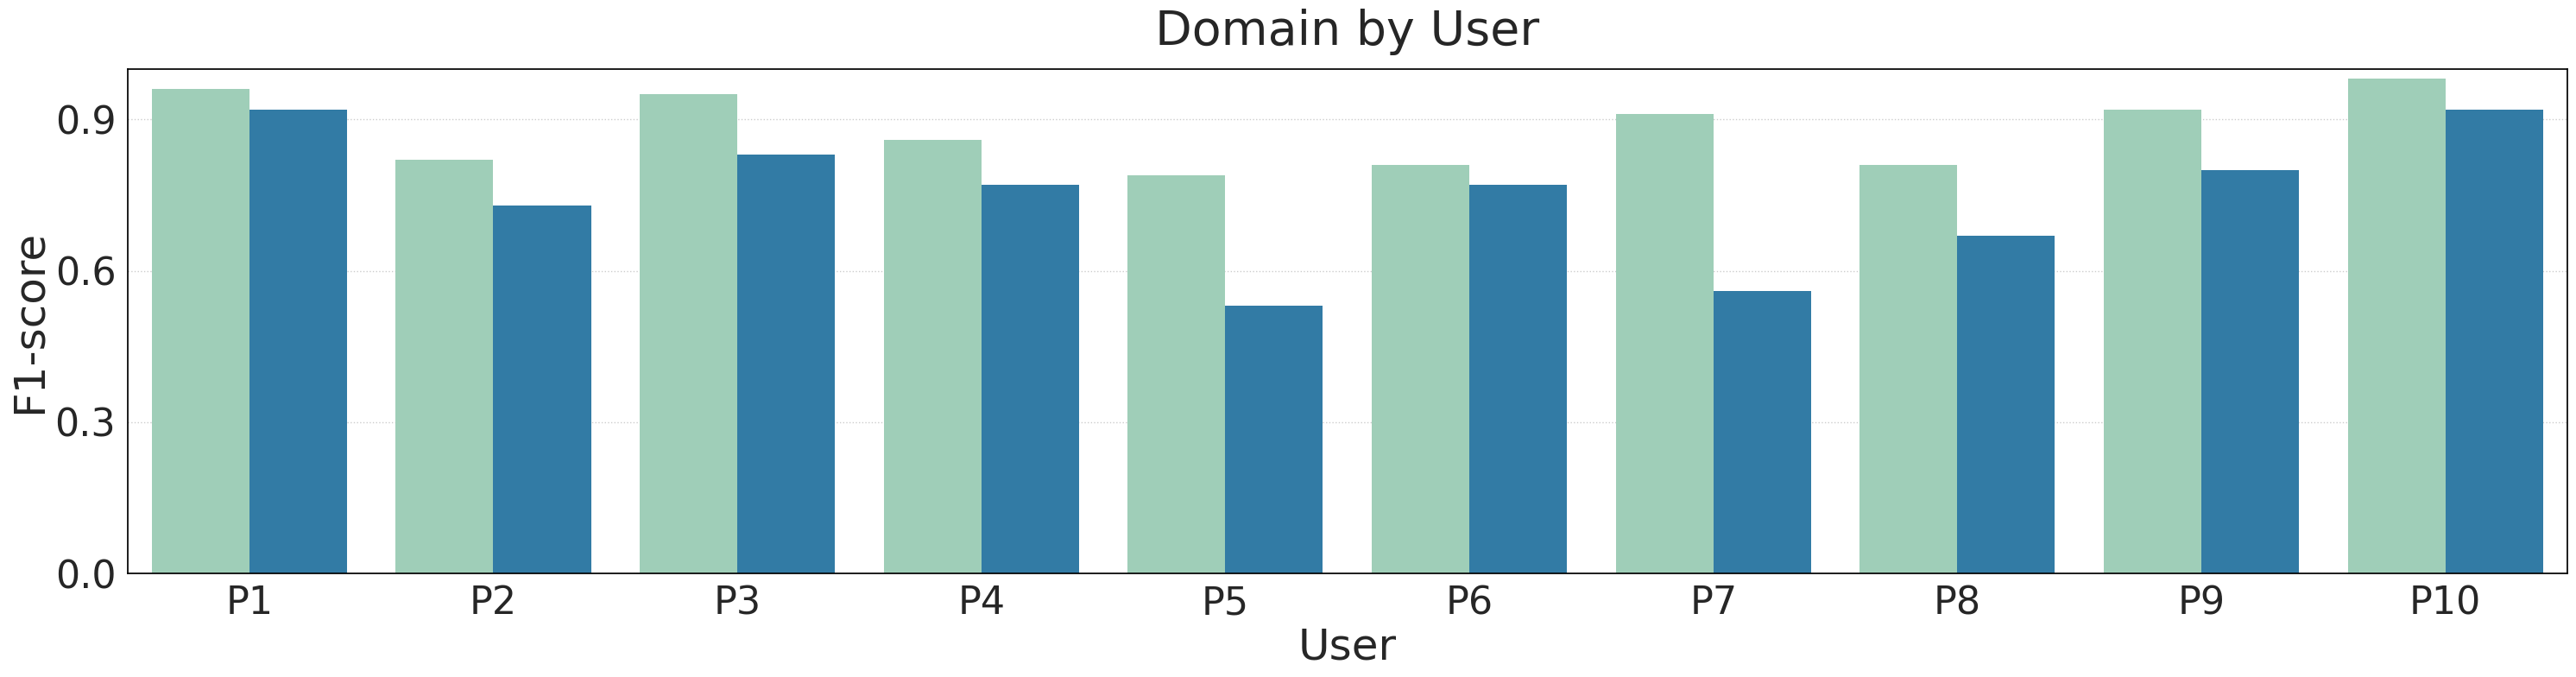

In [55]:
in_domain = '''0.96
0.82
0.95
0.86
0.79
0.81
0.91
0.81
0.92
0.98
'''
out_domain = '''0.92
0.73
0.83
0.77
0.53
0.77
0.56
0.67
0.8
0.92
'''
simclr_motivation_ichar = generate_motivation_study_data(in_domain, out_domain)
plot_motivation_study(simclr_motivation_ichar, palette= palette, use_hatches=use_hatches,
                      hatch1=hatch1, hatch2=hatch2, title='Domain by User', length=30,
                      save='./pdfs/ichar_motivation.pdf', domain='User')

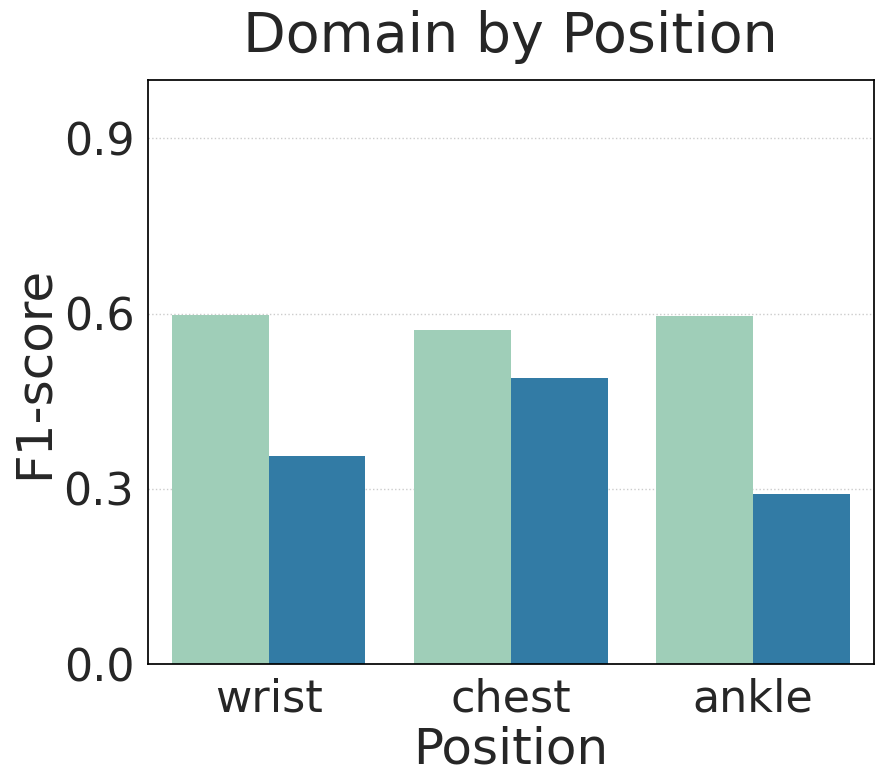

In [56]:
in_domain = '''0.5980
0.5720
0.5960
'''
out_domain = '''0.3560
0.4900
0.2920
'''
cpc_motivation_pamap2 = generate_motivation_study_data(in_domain, out_domain, ['wrist', 'chest', 'ankle'])
plot_motivation_study(cpc_motivation_pamap2, palette= palette, use_hatches=use_hatches,
                      hatch1=hatch1, hatch2=hatch2, title='Domain by Position', length=9,
                      save='./pdfs/pamap2_motivation.pdf', domain='Position')

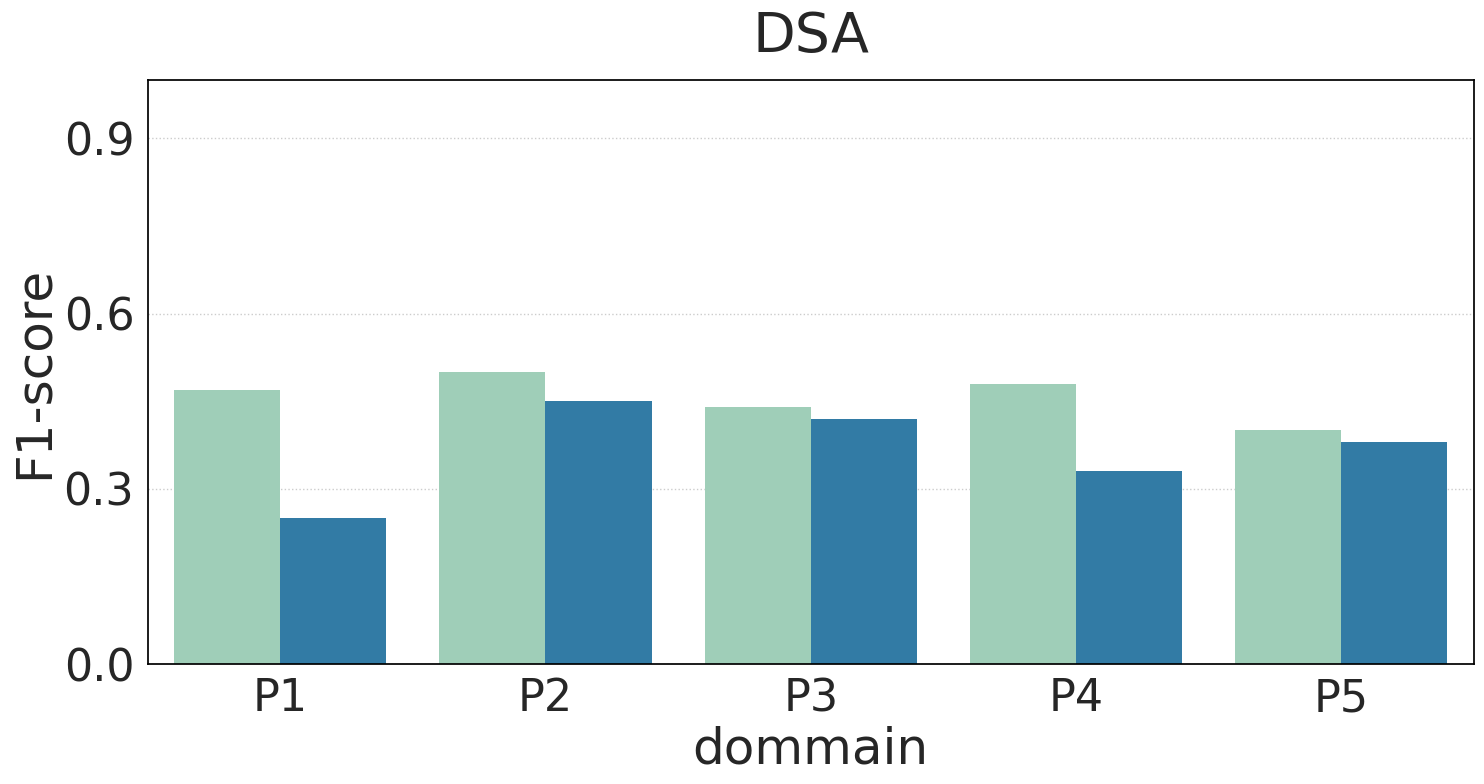

In [57]:
in_domain = '''0.47
0.5
0.44
0.48
0.4
'''
out_domain = '''0.25
0.45
0.42
0.33
0.38
'''
cpc_motivation_dsa = generate_motivation_study_data(in_domain, out_domain)
plot_motivation_study(cpc_motivation_dsa, palette= palette, use_hatches=use_hatches,
                      hatch1=hatch1, hatch2=hatch2, title='DSA', length=15,
                      save='./pdfs/dsa_motivation.pdf')

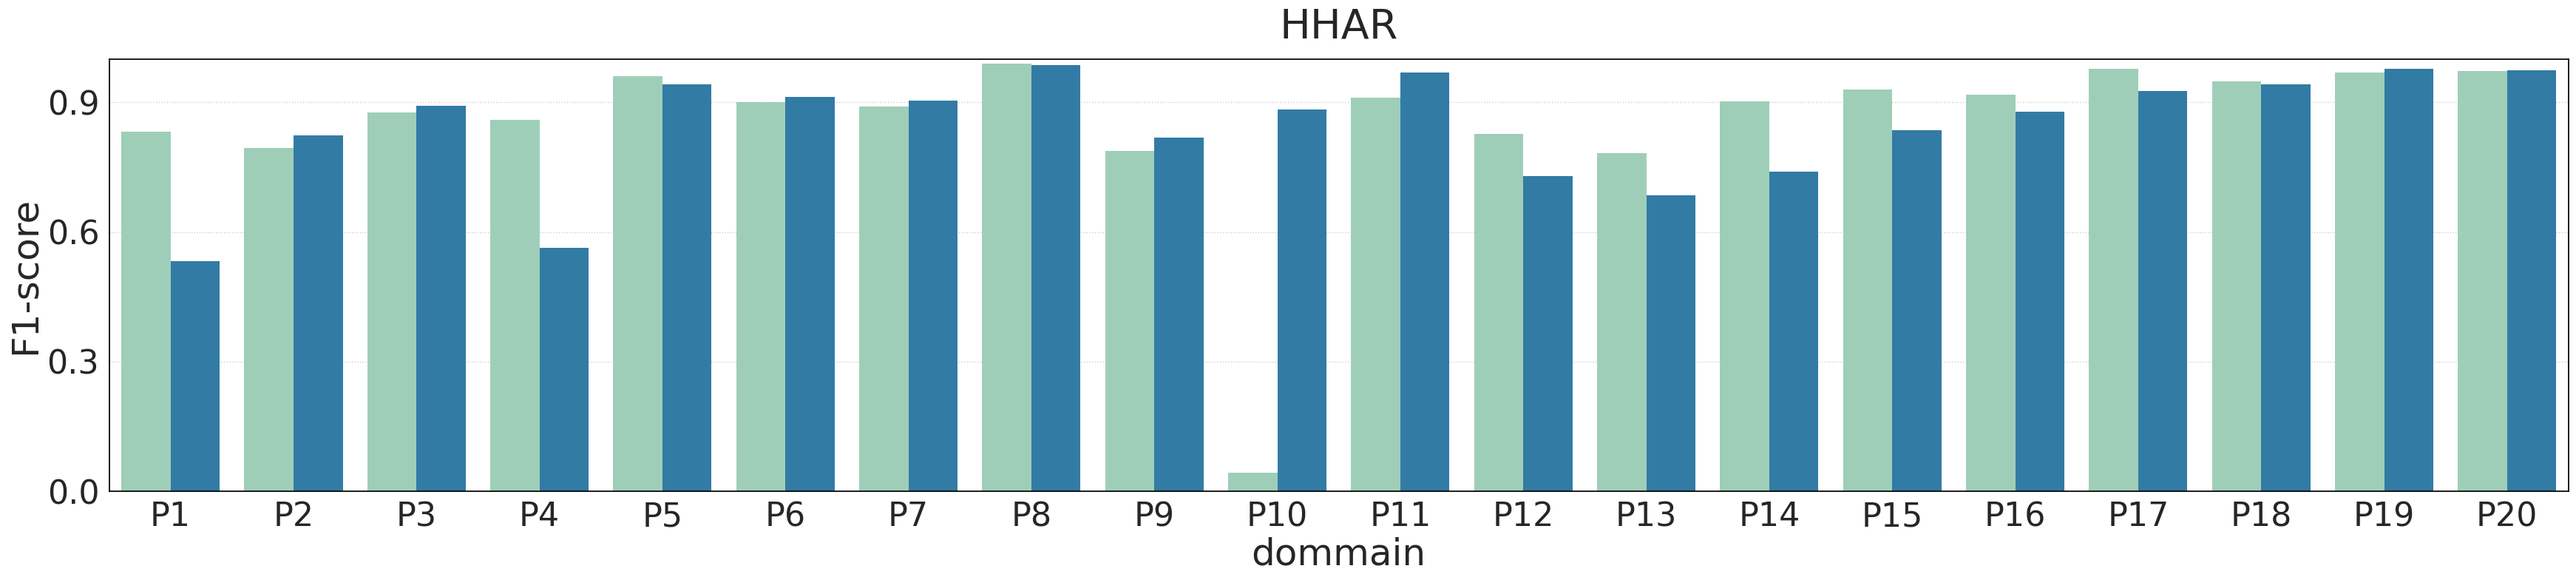

In [138]:
in_domain = '''0.8320
0.7940
0.8760
0.8600
0.9600
0.9000
0.8900
0.9900
0.7880
0.0440
0.9100
0.8260
0.7820
0.9020
0.9300
0.9180
0.9780
0.9480
0.9680
0.9720
'''
out_domain = '''0.5320
0.8240
0.8920
0.5640
0.9420
0.9120
0.9040
0.9860
0.8180
0.8840
0.9680
0.7300
0.6840
0.7400
0.8360
0.8780
0.9260
0.9420
0.9780
0.9740
'''
cpc_motivation_hhar = generate_motivation_study_data(in_domain, out_domain)
plot_motivation_study(cpc_motivation_hhar, palette= palette, use_hatches=use_hatches,
                      hatch1=hatch1, hatch2=hatch2, title='HHAR', length=35,
                      save='./pdfs/hhar_motivation.pdf')

In [58]:
plot_computational_overhead(overhead_data, palette= palette, use_hatches=use_hatches, hatch1=hatch1, hatch2=hatch2)

NameError: name 'overhead_data' is not defined

In [59]:
def plot_baseline_vs_architecture(df_pair, palette="coolwarm", 
                                  use_hatches=True, hatch1="//", hatch2="++",
                                  size=(36,6), save=None, plot_legend=True):
    df = df_pair[0]
    stds = df_pair[1]
    datasets = df["dataset"].unique().tolist()
    shots = [1, 2, 5, 10]
    methods = ["Linear eval.", "End-to-end", "Adapt$^2$ (ours)"]
    
    fig, ax = plt.subplots(figsize=(36, 6))
    width = 0.2  # Width of each bar
    x = np.arange(len(datasets))*3.9
    print(x)
    
    colors = {
        "Linear eval.": "#003f5c",
        "End-to-end": "#58508d",
        "Adapt$^2$ (ours)": "#ff6361"
    }
    
    legend_handles = []  # Custom legend handles
    legend_labels = []   # Custom legend labels
    
    xtick_locs = []
    for i, dataset in enumerate(datasets):
        for j, shot in enumerate(shots):
            for method in methods:
                df_subset = df[(df["dataset"] == dataset) & (df["shot"] == shot) & (df["method"] == method)]
                std_subset = stds[(stds["dataset"] == dataset) & (stds["shot"] == shot) & (stds["method"] == method)]
                bars = ax.bar(x[i] + width * ((j - 1)*4.2 + methods.index(method)),
                              df_subset["accuracy"], width, label=f"Method: {method}",
                              color=colors[method], yerr=std_subset["accuracy"])
                if use_hatches:
                    for bar in bars:
                        bar.set_hatch(hatch1 if methods.index(method) < len(datasets) else hatch2)
                
                if i == 0 and j == 0:
                    legend_handles.append(Patch(color=colors[method], label=method))
                    legend_labels.append(method)
            xtick_locs.append(x[i] + width * ((j - 1)*4.2+1))
    
    # ax.set_xlabel("Model")
    ax.set_ylabel("F1-score", fontsize=36)
    # ax.set_title("Comparison of Models")
    ax.set_xticks(xtick_locs)
    ax.set_xticklabels(["1shot", "2shot", "5shot", "10shot"] * 4)
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    if plot_legend:
        ax.legend(handles=legend_handles, labels=legend_labels, loc='best', fontsize=36)
    
    if save != None:
        plt.savefig(save, bbox_inches='tight')
    
    plt.tight_layout()
    plt.show()


In [60]:
def generate_baseline_vs_architecture_data(mean_vals, std_vals):
    mean_vals = mean_vals.split('\n')
    mean_vals = [[float(y) for y in x.split()] for x in mean_vals]
    std_vals = std_vals.split('\n')
    std_vals = [[float(y) for y in x.split()] for x in std_vals]
    
    shots = [1, 2, 5, 10]
    models = ["CPC", "SimCLR", "Multi-task"]
    methods = ["Linear eval.", "End-to-end", "Adapt$^2$ (ours)"]
    datasets = ['ICHAR', 'HHAR', 'PAMAP2', 'DSA']
    ret = {}
    for m, model in enumerate(models):
        mean_list = []
        val_list = []
        for i, shot in enumerate(shots):
            for j, dataset in enumerate(datasets):
                for k, method in enumerate(methods):
                    acc = mean_vals[m*12+k*4+i][j]
                    acc_std = std_vals[m*12+k*4+i][j]
                    mean_list.append({"shot": shot, "dataset": dataset, "method": method, "accuracy": acc})
                    val_list.append({"shot": shot, "dataset": dataset, "method": method, "accuracy": acc_std})
        mean_df = pd.DataFrame(mean_list)
        std_df = pd.DataFrame(val_list)
        ret[model] = [mean_df, std_df]
    return ret

In [61]:
mean_data = '''0.506	0.656	0.405	0.237
0.450	0.636	0.389	0.212
0.631	0.826	0.497	0.317
0.745	0.866	0.549	0.391
0.323	0.575	0.335	0.044
0.442	0.716	0.439	0.092
0.561	0.799	0.529	0.159
0.663	0.836	0.589	0.253
0.602	0.696	0.441	0.241
0.655	0.802	0.504	0.347
0.795	0.886	0.589	0.456
0.836	0.903	0.639	0.526
0.535	0.628	0.315	0.163
0.625	0.763	0.337	0.222
0.738	0.817	0.395	0.317
0.765	0.846	0.379	0.371
0.581	0.637	0.351	0.143
0.692	0.765	0.360	0.202
0.750	0.825	0.432	0.305
0.816	0.849	0.484	0.352
0.616	0.730	0.382	0.201
0.726	0.801	0.437	0.282
0.802	0.835	0.515	0.380
0.826	0.871	0.527	0.419
0.505	0.685	0.451	0.264
0.527	0.760	0.497	0.300
0.630	0.846	0.569	0.402
0.716	0.877	0.630	0.456
0.411	0.630	0.418	0.120
0.500	0.754	0.475	0.168
0.595	0.829	0.569	0.274
0.718	0.865	0.636	0.378
0.561	0.686	0.451	0.306
0.612	0.773	0.510	0.381
0.718	0.848	0.598	0.486
0.794	0.891	0.659	0.578'''

std_data = '''0.032	0.014	0.020	0.004
0.030	0.028	0.014	0.016
0.016	0.009	0.007	0.009
0.024	0.008	0.016	0.006
0.022	0.008	0.024	0.005
0.029	0.023	0.011	0.016
0.029	0.030	0.017	0.022
0.028	0.029	0.046	0.022
0.030	0.014	0.016	0.005
0.016	0.008	0.006	0.006
0.021	0.006	0.010	0.013
0.011	0.004	0.030	0.019
0.019	0.032	0.010	0.004
0.015	0.004	0.023	0.006
0.006	0.003	0.040	0.007
0.016	0.005	0.017	0.005
0.024	0.029	0.021	0.003
0.017	0.017	0.013	0.009
0.025	0.025	0.017	0.016
0.013	0.021	0.026	0.017
0.013	0.012	0.010	0.005
0.002	0.004	0.004	0.004
0.006	0.006	0.021	0.008
0.008	0.005	0.017	0.008
0.031	0.020	0.006	0.004
0.039	0.006	0.004	0.006
0.007	0.005	0.007	0.005
0.010	0.003	0.003	0.004
0.036	0.014	0.011	0.015
0.013	0.020	0.030	0.014
0.042	0.022	0.033	0.025
0.019	0.030	0.015	0.021
0.023	0.015	0.007	0.008
0.036	0.009	0.007	0.005
0.024	0.014	0.004	0.005
0.015	0.005	0.016	0.011'''

baseline_vs_architecture_data = generate_baseline_vs_architecture_data(mean_data, std_data)

[ 0.   3.9  7.8 11.7]


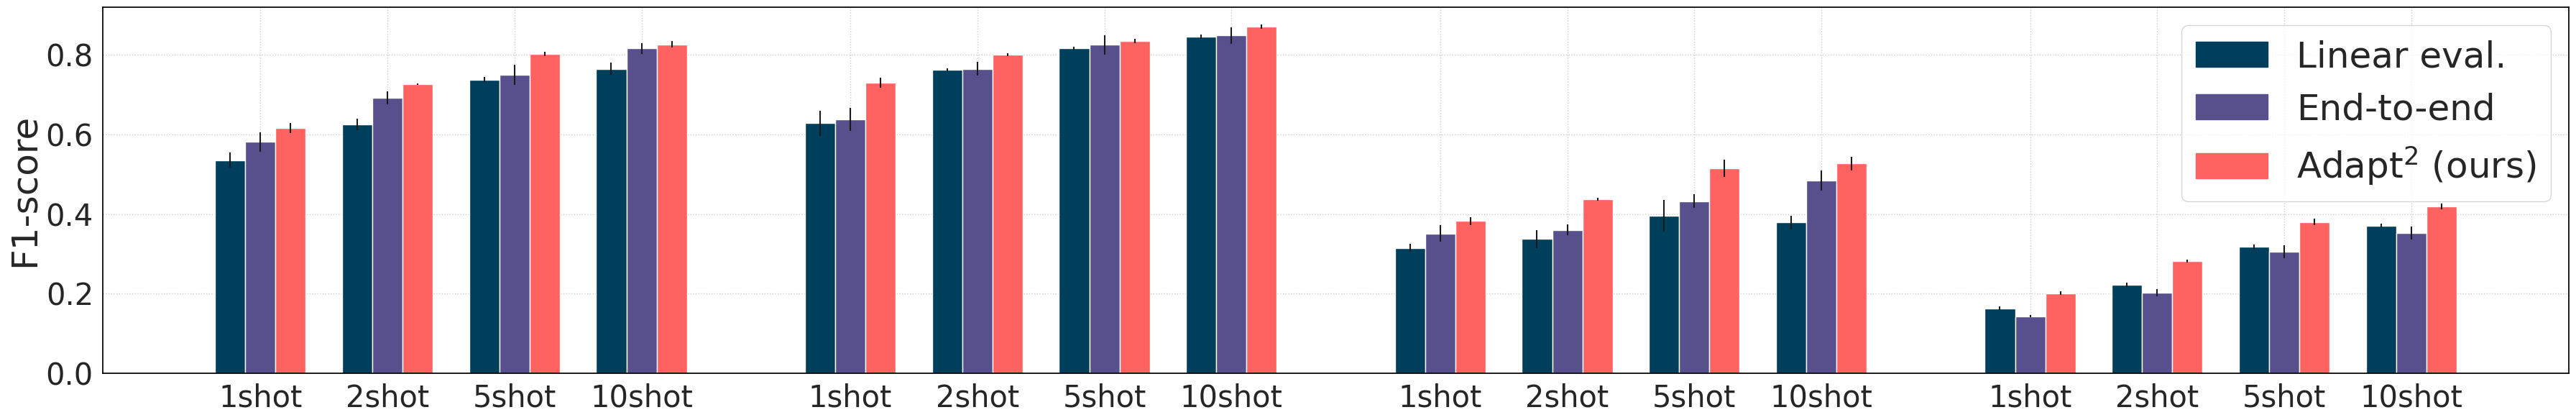

In [62]:
SimCLR_shot_data = baseline_vs_architecture_data['SimCLR']
plot_baseline_vs_architecture(SimCLR_shot_data, palette= palette,
                              use_hatches=use_hatches, hatch1=hatch1, hatch2=hatch2,
                              size=(30, 6), save='./pdfs/eval_simclr_shots.pdf')

[ 0.   3.9  7.8 11.7]


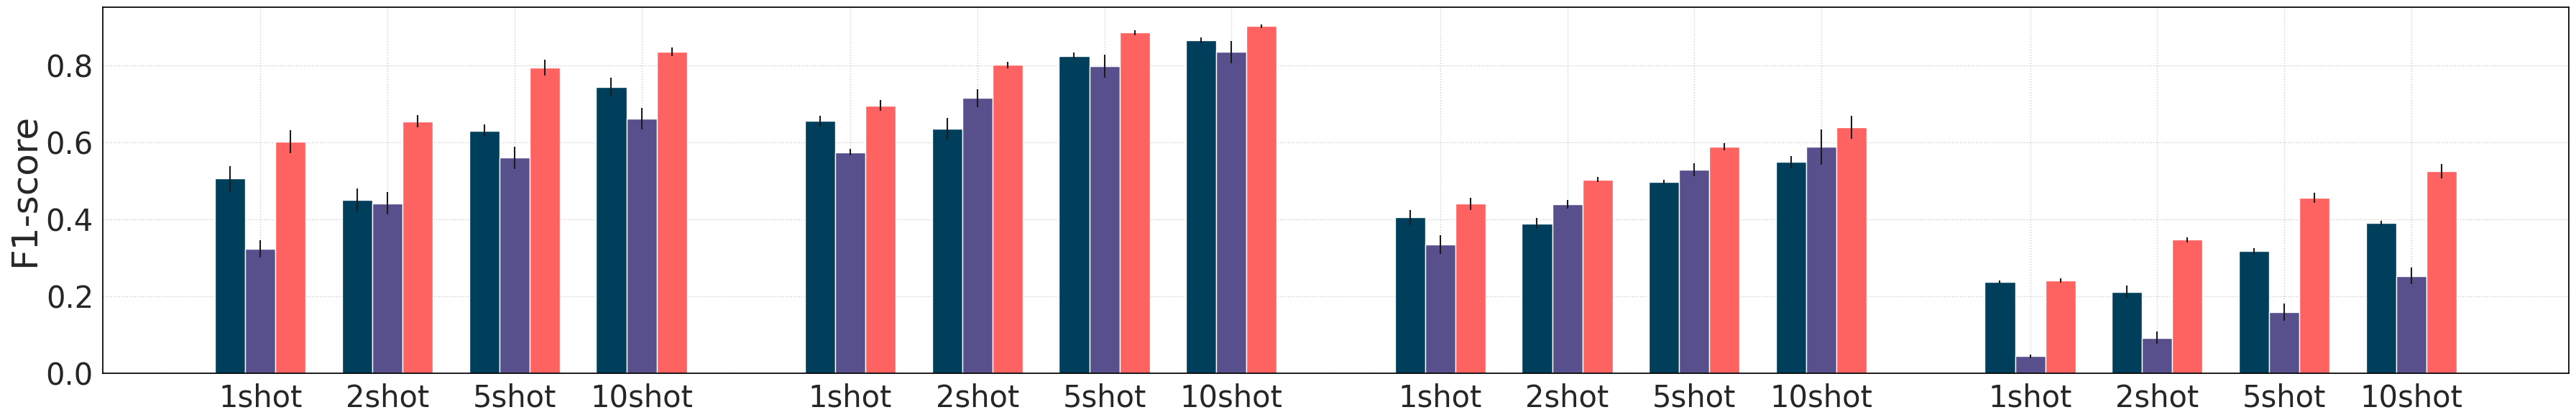

In [63]:
SimCLR_shot_data = baseline_vs_architecture_data['CPC']
plot_baseline_vs_architecture(SimCLR_shot_data, palette= palette,
                              use_hatches=use_hatches, hatch1=hatch1, hatch2=hatch2,
                              size=(30, 6), save='./pdfs/eval_cpc_shots.pdf', plot_legend=False)

[ 0.   3.9  7.8 11.7]


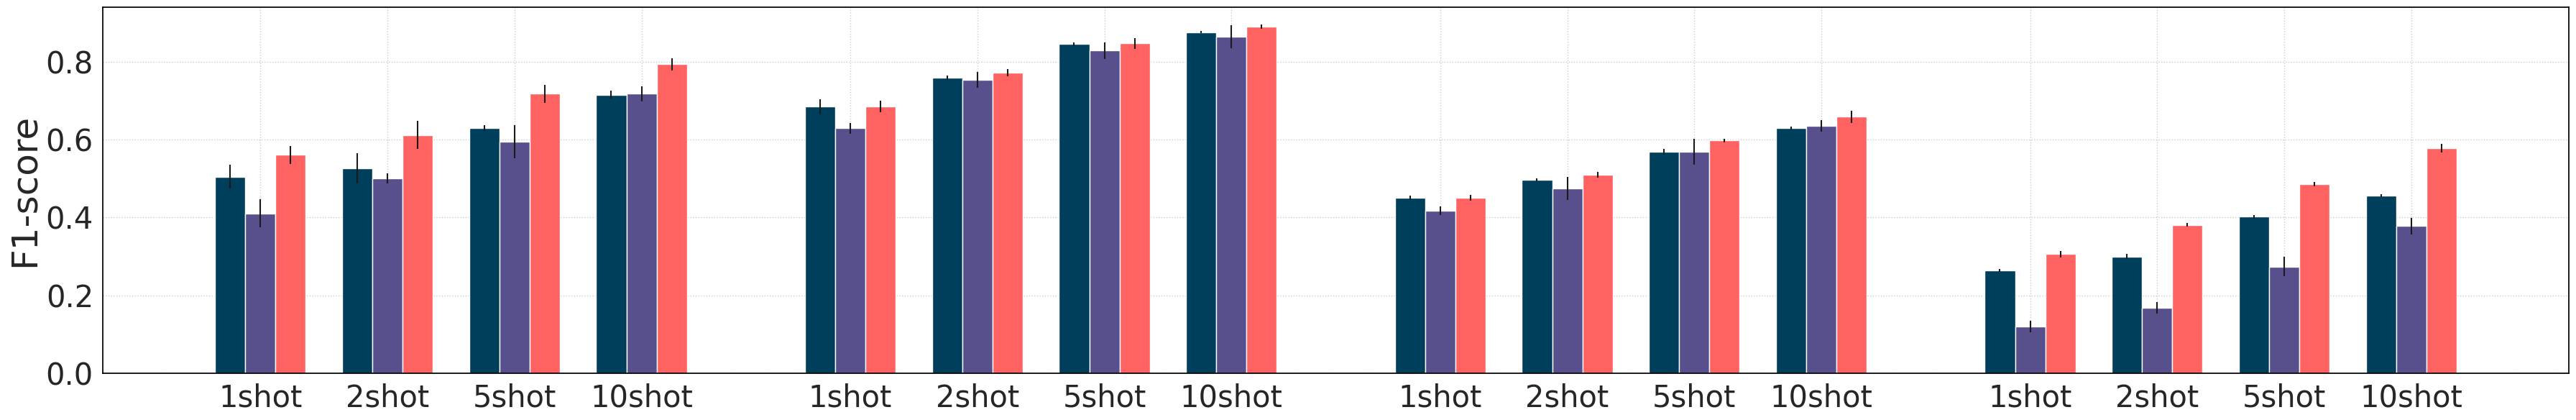

In [64]:
SimCLR_shot_data = baseline_vs_architecture_data['Multi-task']
plot_baseline_vs_architecture(SimCLR_shot_data, palette= palette,
                              use_hatches=use_hatches, hatch1=hatch1, hatch2=hatch2,
                              size=(30, 6), save='./pdfs/eval_multitask_shots.pdf', plot_legend=False)

In [65]:
def generate_baseline_vs_architecture_data2(mean_vals, std_vals):
    mean_vals = mean_vals.split('\n')
    mean_vals = [[float(y) for y in x.split()] for x in mean_vals]
    std_vals = std_vals.split('\n')
    std_vals = [[float(y) for y in x.split()] for x in std_vals]
    
    shots = [1, 2, 5, 10]
    # models = ["CPC", "SimCLR", "Multi-task"]
    models = ["SimCLR"]
    methods = ["Random", "SimCLR (linear eval.)", "SimCLR (end-to-end)",
               "Set-SimCLR (linear eval.)", "Set-SimCLR (end-to-end)",
               "DARLING (linear eval.)", "DARLING (end-to-end)",
               "Adapt$^2$ (ours)"]
    datasets = ['ICHAR', 'HHAR', 'PAMAP2', 'DSA']
    ret = {}
    for m, model in enumerate(models):
        mean_list = []
        val_list = []
        for i, shot in enumerate(shots):
            for j, dataset in enumerate(datasets):
                for k, method in enumerate(methods):
                    acc = mean_vals[k*4+i][j]
                    acc_std = std_vals[k*4+i][j]
                    mean_list.append({"shot": shot, "dataset": dataset, "method": method, "accuracy": acc})
                    val_list.append({"shot": shot, "dataset": dataset, "method": method, "accuracy": acc_std})
        mean_df = pd.DataFrame(mean_list)
        std_df = pd.DataFrame(val_list)
        ret[model] = [mean_df, std_df]
    return ret

In [66]:
def plot_baseline_vs_architecture2(df_pair, palette="coolwarm", 
                                  use_hatches=True, hatch1="//", hatch2="++",
                                  size=(36,8), save=None, plot_legend=True):
    df = df_pair[0]
    stds = df_pair[1]
    datasets = df["dataset"].unique().tolist()
    shots = [1, 2, 5, 10]
    methods = ["Random", "SimCLR (linear eval.)", "SimCLR (end-to-end)",
               "Set-SimCLR (linear eval.)", "Set-SimCLR (end-to-end)",
               "DARLING (linear eval.)", "DARLING (end-to-end)",
               "Adapt$^2$ (ours)"]
    
    fig, ax = plt.subplots(figsize=(36, 7))
    width = 0.2  # Width of each bar
    x = np.arange(len(datasets))*8
    print(x)
    
    colors = {
        "Random": "#5f0f40",
        "SimCLR (linear eval.)": "#003f5c",
        "SimCLR (end-to-end)": "#58508d",
        "Set-SimCLR (linear eval.)": "#9a031e",
        "Set-SimCLR (end-to-end)": "#e36414",
        "DARLING (linear eval.)": "#06d6a0",
        "DARLING (end-to-end)": "#118ab2",
        "Adapt$^2$ (ours)": "#ff6361"
    }
    
    legend_handles = []  # Custom legend handles
    legend_labels = []   # Custom legend labels
    
    xtick_locs = []
    for i, dataset in enumerate(datasets):
        for j, shot in enumerate(shots):
            for method in methods:
                df_subset = df[(df["dataset"] == dataset) & (df["shot"] == shot) & (df["method"] == method)]
                std_subset = stds[(stds["dataset"] == dataset) & (stds["shot"] == shot) & (stds["method"] == method)]
                bars = ax.bar(x[i] + width * ((j - 1)*9 + methods.index(method)),
                              df_subset["accuracy"], width, label=f"Method: {method}",
                              color=colors[method], yerr=std_subset["accuracy"])
                if use_hatches:
                    for bar in bars:
                        bar.set_hatch(hatch1 if methods.index(method) < len(datasets) else hatch2)
                
                if i == 0 and j == 0:
                    legend_handles.append(Patch(color=colors[method], label=method))
                    legend_labels.append(method)
            xtick_locs.append(x[i] + width * ((j - 1)*9+3.5))
    
    # ax.set_xlabel("Model")
    ax.set_ylabel("F1-score", fontsize=36)
    # ax.set_title("Comparison of Models")
    ax.set_xticks(xtick_locs)
    ax.set_xticklabels(["1shot", "2shot", "5shot", "10shot"] * 4)
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    if plot_legend:
        ax.legend(handles=legend_handles, labels=legend_labels, loc='best', ncols=3, fontsize=21)
    
    if save != None:
        plt.savefig(save, bbox_inches='tight')
    
    plt.tight_layout()
    plt.show()


In [67]:
mean_data = '''0.072	0.120	0.159	0.024
0.123	0.258	0.188	0.032
0.186	0.276	0.227	0.048
0.223	0.337	0.234	0.043
0.506	0.656	0.405	0.237
0.450	0.636	0.389	0.212
0.631	0.826	0.497	0.317
0.745	0.866	0.549	0.391
0.323	0.575	0.335	0.044
0.442	0.716	0.439	0.092
0.561	0.799	0.529	0.159
0.663	0.836	0.589	0.253
0.542	0.653	0.358	0.171
0.568	0.688	0.395	0.168
0.704	0.772	0.435	0.228
0.758	0.814	0.487	0.283
0.458	0.617	0.347	0.085
0.597	0.740	0.405	0.113
0.703	0.799	0.515	0.133
0.747	0.848	0.573	0.165
0.488	0.582	0.401	0.236
0.463	0.590	0.363	0.224
0.650	0.782	0.483	0.322
0.749	0.831	0.551	0.399
0.351	0.563	0.367	0.050
0.459	0.724	0.411	0.098
0.564	0.811	0.538	0.186
0.656	0.844	0.580	0.258
0.602	0.696	0.441	0.241
0.655	0.802	0.504	0.347
0.795	0.886	0.589	0.456
0.836	0.903	0.639	0.526'''

std_data = '''0.018	0.049	0.035	0.003
0.024	0.058	0.038	0.011
0.043	0.077	0.037	0.014
0.065	0.067	0.026	0.016
0.032	0.014	0.020	0.004
0.030	0.028	0.014	0.016
0.016	0.009	0.007	0.009
0.024	0.008	0.016	0.006
0.022	0.008	0.024	0.005
0.029	0.023	0.011	0.016
0.029	0.030	0.017	0.022
0.028	0.029	0.046	0.022
0.008	0.005	0.010	0.002
0.015	0.005	0.007	0.007
0.008	0.005	0.010	0.008
0.010	0.004	0.011	0.007
0.034	0.017	0.012	0.012
0.010	0.007	0.020	0.014
0.025	0.018	0.027	0.009
0.029	0.016	0.015	0.012
0.028	0.022	0.007	0.002
0.034	0.029	0.010	0.010
0.023	0.012	0.009	0.004
0.019	0.003	0.012	0.008
0.019	0.030	0.013	0.010
0.029	0.019	0.028	0.013
0.018	0.021	0.020	0.029
0.019	0.026	0.042	0.024
0.030	0.014	0.016	0.005
0.016	0.008	0.006	0.006
0.021	0.006	0.010	0.013
0.011	0.004	0.030	0.019'''

baseline_data = generate_baseline_vs_architecture_data2(mean_data, std_data)["SimCLR"]

[ 0  8 16 24]


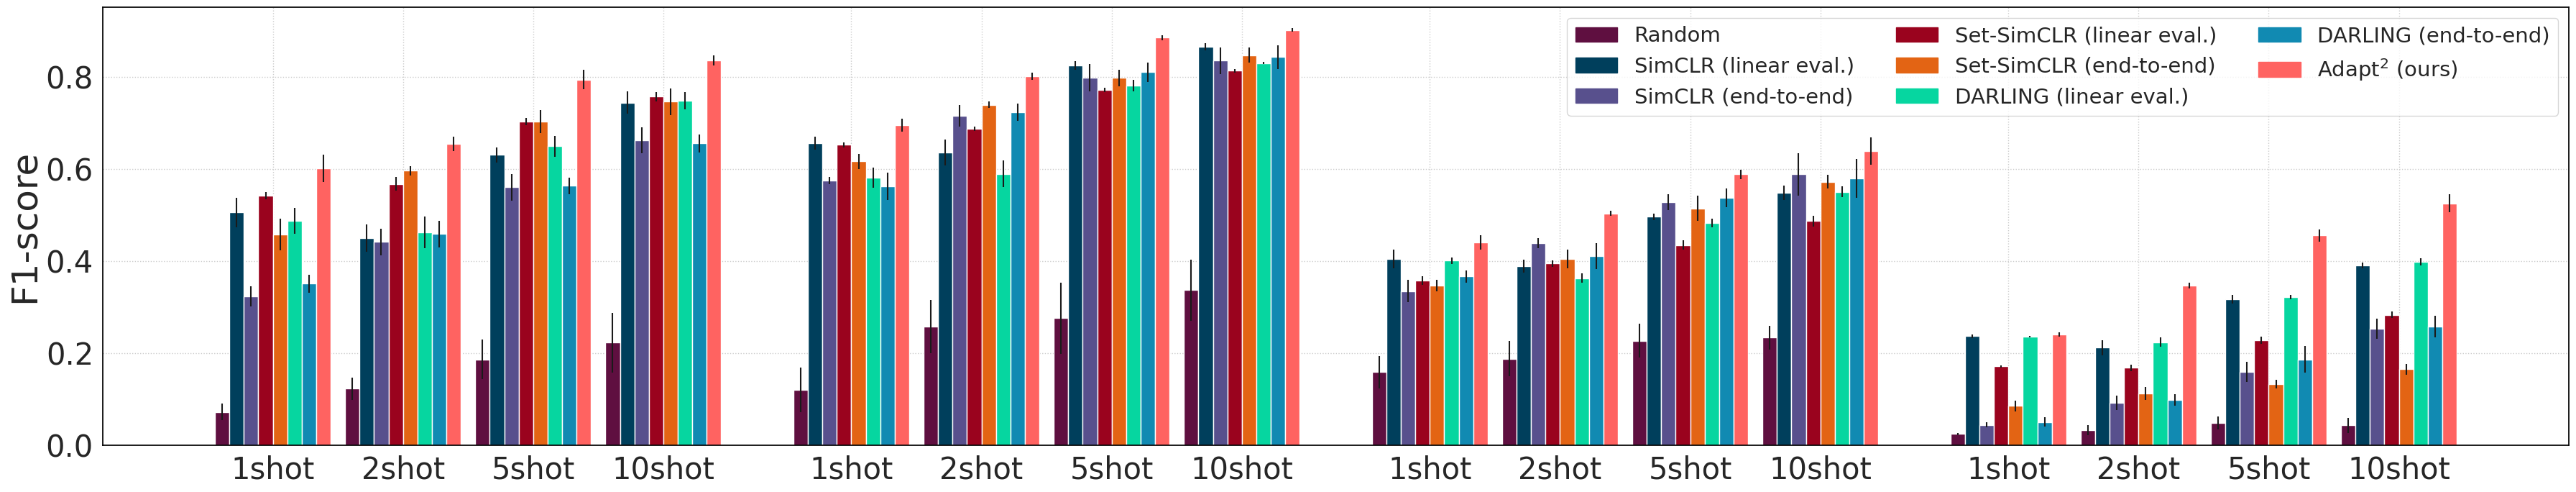

In [68]:
plot_baseline_vs_architecture2(baseline_data, palette= palette,
                              use_hatches=use_hatches, hatch1=hatch1, hatch2=hatch2,
                              size=(30, 6), save='./pdfs/eval_baseline_shots.pdf')

In [21]:
def generate_ablation_data(mean_vals, std_vals):
    mean_vals = mean_vals.split('\n')
    mean_vals = [[float(y) for y in x.split()] for x in mean_vals]
    std_vals = std_vals.split('\n')
    std_vals = [[float(y) for y in x.split()] for x in std_vals]
    
    methods = ['baseline', 'w/ pretext replay', 'w/ meta learning', 'Adapt$^2$ (ours)']
    models = ["SimCLR", "CPC", "Multi-task"]
    datasets = ['ICHAR', 'HHAR', 'PAMAP2', 'DSA']
    ret = {}
    for m, model in enumerate(models):
        mean_list = []
        val_list = []
        for i, method in enumerate(methods):
            for j, dataset in enumerate(datasets):
                acc = mean_vals[m*4+i][j]
                acc_std = std_vals[m*4+i][j]
                mean_list.append({"dataset": dataset, "method": method, "accuracy": acc})
                val_list.append({"dataset": dataset, "method": method, "accuracy": acc_std})
        mean_df = pd.DataFrame(mean_list)
        std_df = pd.DataFrame(val_list)
        ret[model] = [mean_df, std_df]
    return ret

In [69]:
mean_data = '''0.745	0.866	0.549	0.391
0.731	0.638	0.464	0.294
0.822	0.898	0.626	0.469
0.836	0.903	0.639	0.526
0.765	0.846	0.379	0.371
0.782	0.864	0.402	0.386
0.669	0.819	0.425	0.286
0.826	0.871	0.527	0.419
0.716	0.877	0.630	0.456
0.612	0.836	0.637	0.449
0.806	0.882	0.635	0.585
0.794	0.891	0.659	0.578'''

std_data = '''0.024	0.008	0.016	0.006
0.029	0.044	0.063	0.011
0.014	0.007	0.015	0.005
0.011	0.004	0.030	0.019
0.016	0.005	0.017	0.005
0.015	0.008	0.029	0.006
0.009	0.002	0.020	0.019
0.008	0.005	0.017	0.008
0.010	0.003	0.003	0.004
0.034	0.022	0.009	0.004
0.004	0.009	0.010	0.005
0.015	0.005	0.016	0.011'''

ablation_data = generate_ablation_data(mean_data, std_data)

In [129]:
def plot_ablation(df_pair, palette="coolwarm",
                  use_hatches=True, hatch1="//", hatch2="++",
                  size=(36,8), save=None, plot_legend=True):
    df = df_pair[0]
    stds = df_pair[1]
    datasets = df["dataset"].unique().tolist()
    methods = df["method"].unique().tolist()
    
    fig, ax = plt.subplots(figsize=size)
    width = 0.1  # Width of each bar
    x = np.arange(len(datasets))*0.6
    print(x)
    
    colors = {
        "baseline": "#003f5c",
        "w/ pretext replay": "#c9ada7",
        "w/ meta learning": "#941b0c",
        "Adapt$^2$ (ours)": "#ff6361"
    }
    
    legend_handles = []  # Custom legend handles
    legend_labels = []   # Custom legend labels
    
    xtick_locs = []
    for i, dataset in enumerate(datasets):
        for j, method in enumerate(methods):
            df_subset = df[(df["dataset"] == dataset) & (df["method"] == method)]
            std_subset = stds[(stds["dataset"] == dataset) & (stds["method"] == method)]
            bars = ax.bar(x[i] + width * (j-1),
                            df_subset["accuracy"], width, label=f"Method: {method}",
                            color=colors[method], yerr=std_subset["accuracy"])
            if use_hatches:
                for bar in bars:
                    bar.set_hatch(hatch1 if methods.index(method) < len(datasets) else hatch2)
            
            if i == 0:
                legend_handles.append(Patch(color=colors[method], label=method))
                legend_labels.append(method)
        xtick_locs.append(x[i]+width/2)
    
    # ax.set_xlabel("Model")
    ax.set_ylabel("F1-score", fontsize=36)
    # ax.set_title("Comparison of Models")
    ax.set_xticks(xtick_locs)
    ax.set_xticklabels(["ICHAR", "HHAR", "PAMAP2", "DSA"])
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    if plot_legend:
        ax.legend(handles=legend_handles, labels=legend_labels, loc='best', ncols=2, fontsize=21)
    
    if save != None:
        plt.savefig(save, bbox_inches='tight')
    
    plt.tight_layout()
    plt.show()


[0.  0.6 1.2 1.8]


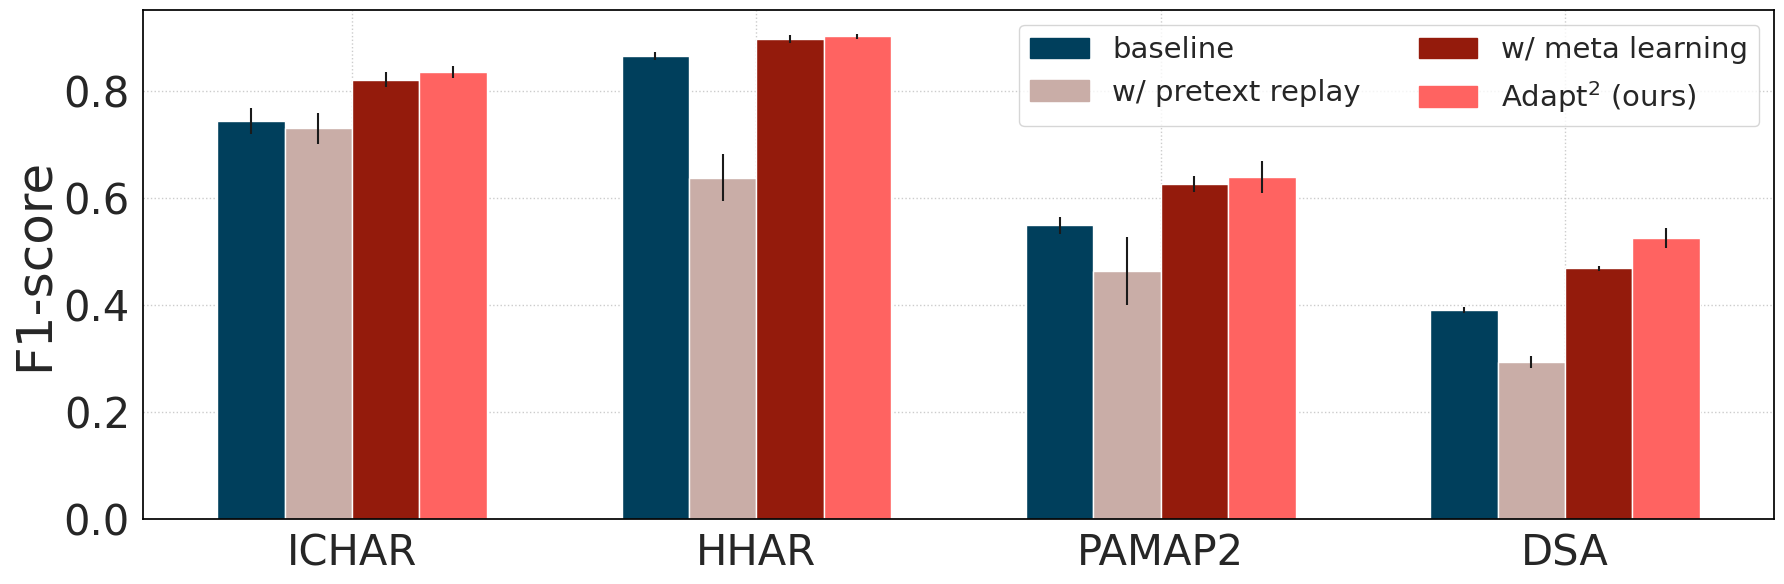

In [133]:
simclr_ablation = ablation_data['SimCLR']
plot_ablation(simclr_ablation, palette= palette,
                              use_hatches=use_hatches, hatch1=hatch1, hatch2=hatch2,
                              size=(18, 6), save='./pdfs/eval_simclr_ablation.pdf')

[0.  0.6 1.2 1.8]


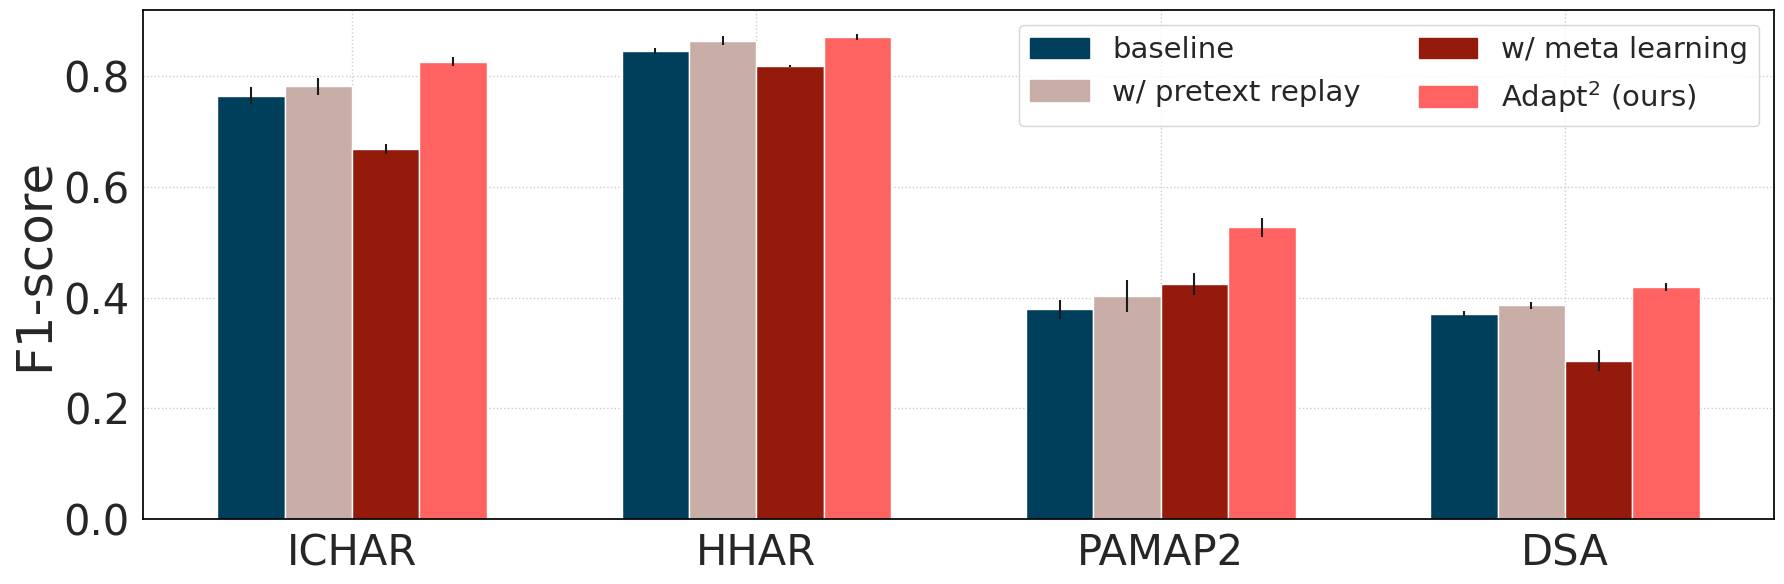

In [134]:
cpc_ablation = ablation_data['CPC']
plot_ablation(cpc_ablation, palette= palette,
                              use_hatches=use_hatches, hatch1=hatch1, hatch2=hatch2,
                              size=(18, 6), save='./pdfs/eval_cpc_ablation.pdf')

[0.  0.6 1.2 1.8]


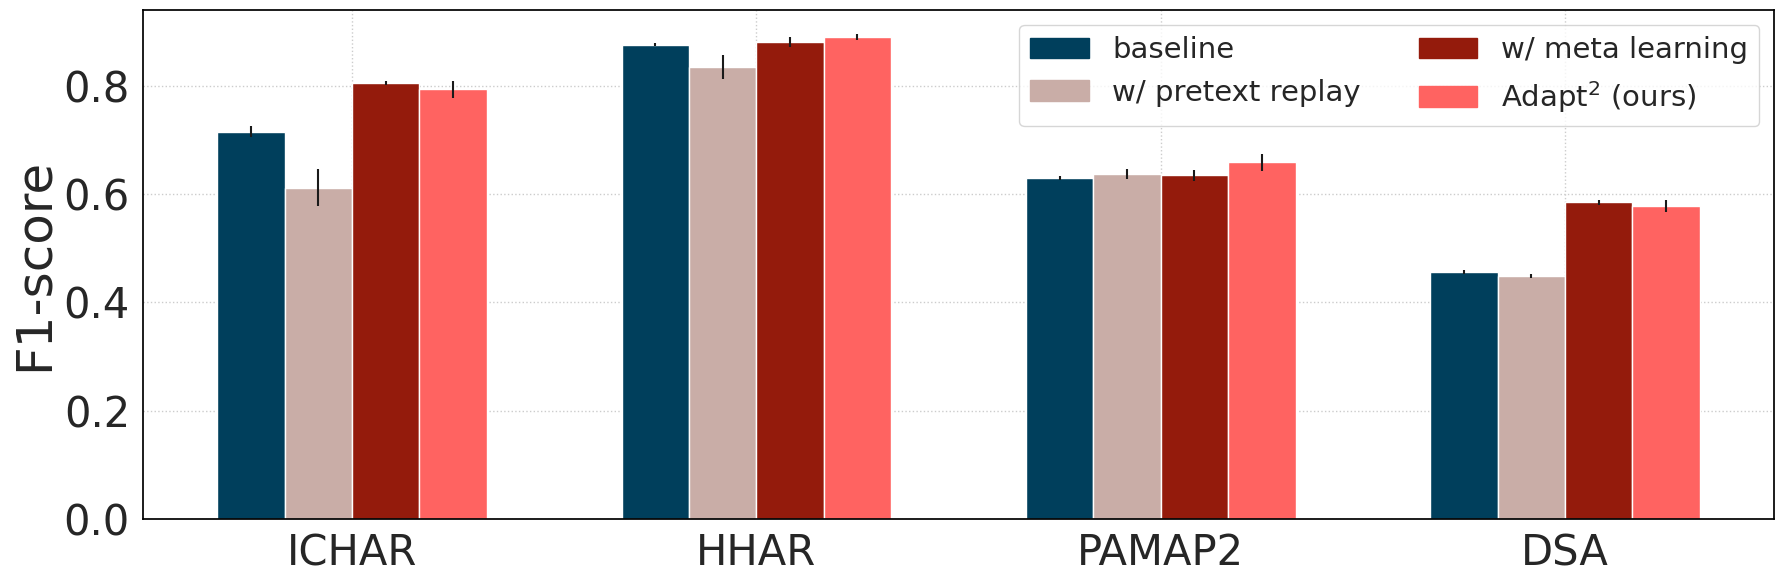

In [135]:
tpn_ablation = ablation_data['Multi-task']
plot_ablation(tpn_ablation, palette= palette,
                              use_hatches=use_hatches, hatch1=hatch1, hatch2=hatch2,
                              size=(18, 6), save='./pdfs/eval_multitask_ablation.pdf')

In [19]:
def gen_gsheet_shots_exp(type='eval_mean'):
    order = 'K U Q J T P L V R'.split()
    order = 'D K U N X O Y Q'.split()
    ichar_shots_idx = {'1': 55, '2': 97, '5': 139, '10': 13}
    hhar_shots_idx = {k: v + 21 for k, v in ichar_shots_idx.items()}
    pamap2_shots_idx = {k: v + 25 for k, v in ichar_shots_idx.items()}
    dsa_shots_idx = {k: v + 31 for k, v in ichar_shots_idx.items()}
    idxs = [ichar_shots_idx]
    idxs = [hhar_shots_idx]
    idxs = [pamap2_shots_idx]
    idxs = [dsa_shots_idx]
    
    for o in order:
        for shot in ['1', '2', '5', '10']:
            for idx in idxs:
                print(f'={type}!${o}${idx[shot]}', end='')
            print()

In [20]:
gen_gsheet_shots_exp(type='eval_mean')

=eval_mean!$D$86
=eval_mean!$D$128
=eval_mean!$D$170
=eval_mean!$D$44
=eval_mean!$K$86
=eval_mean!$K$128
=eval_mean!$K$170
=eval_mean!$K$44
=eval_mean!$U$86
=eval_mean!$U$128
=eval_mean!$U$170
=eval_mean!$U$44
=eval_mean!$N$86
=eval_mean!$N$128
=eval_mean!$N$170
=eval_mean!$N$44
=eval_mean!$X$86
=eval_mean!$X$128
=eval_mean!$X$170
=eval_mean!$X$44
=eval_mean!$O$86
=eval_mean!$O$128
=eval_mean!$O$170
=eval_mean!$O$44
=eval_mean!$Y$86
=eval_mean!$Y$128
=eval_mean!$Y$170
=eval_mean!$Y$44
=eval_mean!$Q$86
=eval_mean!$Q$128
=eval_mean!$Q$170
=eval_mean!$Q$44
